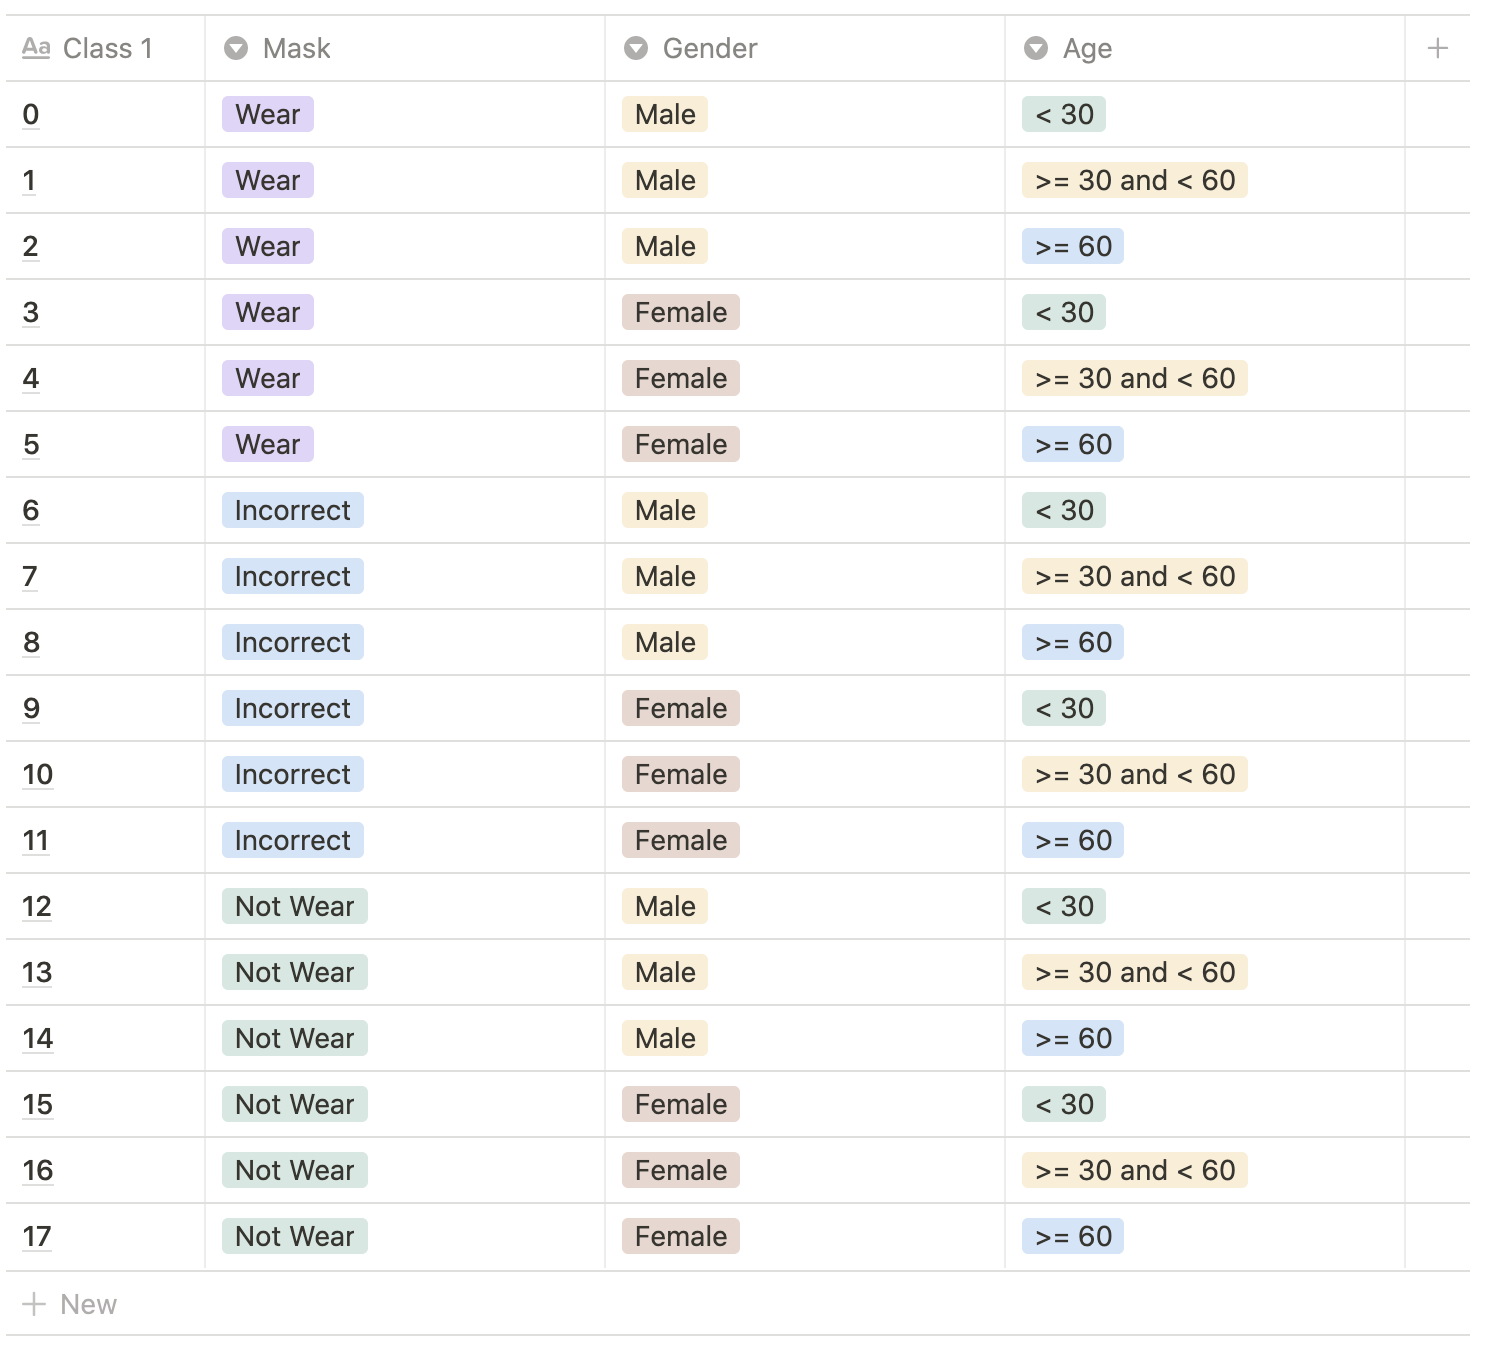

- 데이터 분류
    - Mask
        - wear: 0
        - incorrect: 6
        - not_wear: 12
    - Gender
        - male: 0
        - female: 3
    - Age
        - <30: 0
        - ≥30 and <60: 1
        - ≥60: 2

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [33]:
df = pd.read_csv('./train/train.csv')
df

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,male,Asian,19,006954_male_Asian_19
2696,006955,male,Asian,19,006955_male_Asian_19
2697,006956,male,Asian,19,006956_male_Asian_19
2698,006957,male,Asian,20,006957_male_Asian_20


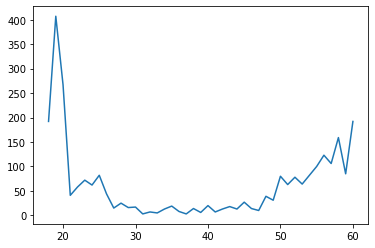

In [26]:
fig = plt.figure()
ax = fig.add_subplot()

# # x = ['30 이하', '30~60', '60 이상']
x = df.groupby(df['age']).size().index.to_list()
y = df.groupby(df['age']).size().to_list()

# # y = [1, 2, 3]

ax.plot(x, y)

plt.show()


In [29]:
# class 및 데이터 구분

def preprocessing_df(df):
    total_data = []
    img_dir = './train/images/'
    
    for _id, gender, _, age, path in df.values:
        temp = [i for i in os.listdir(img_dir+path) if '._' not in i]
        img_path = [img_dir+path+'/'+i for i in temp]
        temp = [i.replace('.jpg','') for i in temp]
        temp = [re.sub('[0-9]','',i) for i in temp]

        for idx, state in enumerate(temp):
            data = [_id, gender, img_path[idx], age]
            group = [0,'< 30'] if age < 30 else [2,'>= 60'] if age >= 60 else [1,'>= 30 and < 60']
            val = 12 if 'mask' not in state else 6 if 'incorrect' in state else 0
            g = 0 if gender == 'male' else 3
            data.extend([group[1], state, val+g+group[0]])
            total_data.append(data)

    temp = pd.DataFrame(total_data, columns=['id', 'gender', 'img_path', 'age', 'age_group', 'mask', 'class'])
    return temp

In [30]:
df_final = preprocessing_df(df)
df_final.to_csv('train_data_total.csv')
df_final

,id,gender,img_path,age,age_group,mask,class
0,000001,female,./train/images/000001_female_Asian_45/incorrec...,45,>= 30 and < 60,incorrect_mask,10
1,000001,female,./train/images/000001_female_Asian_45/mask1.jpg,45,>= 30 and < 60,mask,4
2,000001,female,./train/images/000001_female_Asian_45/mask2.jpg,45,>= 30 and < 60,mask,4
3,000001,female,./train/images/000001_female_Asian_45/mask3.jpg,45,>= 30 and < 60,mask,4
4,000001,female,./train/images/000001_female_Asian_45/mask4.jpg,45,>= 30 and < 60,mask,4
...,...,...,...,...,...,...,...
18895,006959,male,./train/images/006959_male_Asian_19/mask2.jpg,19,< 30,mask,0
18896,006959,male,./train/images/006959_male_Asian_19/mask3.jpg,19,< 30,mask,0
18897,006959,male,./train/images/006959_male_Asian_19/mask4.jpg,19,< 30,mask,0
18898,006959,male,./train/images/006959_male_Asian_19/mask5.jpg,19,< 30,mask,0


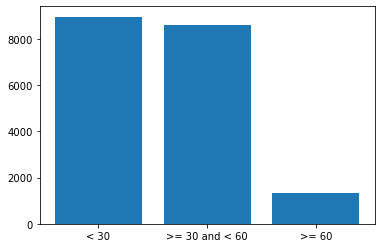

In [87]:
fig = plt.figure()
ax = fig.add_subplot()

x = df_final.groupby(df_final['age_group']).size().index.to_list()
y = df_final.groupby(df_final['age_group']).size().to_list()

ax.bar(x, y)

plt.show()

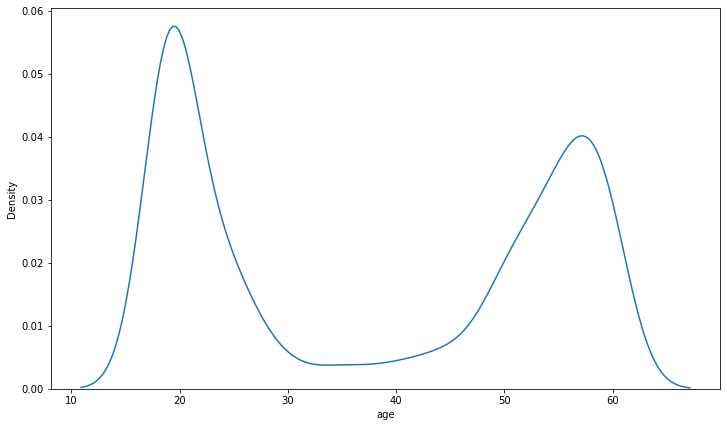

In [99]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='age', data=df_final, ax=ax)
plt.show()

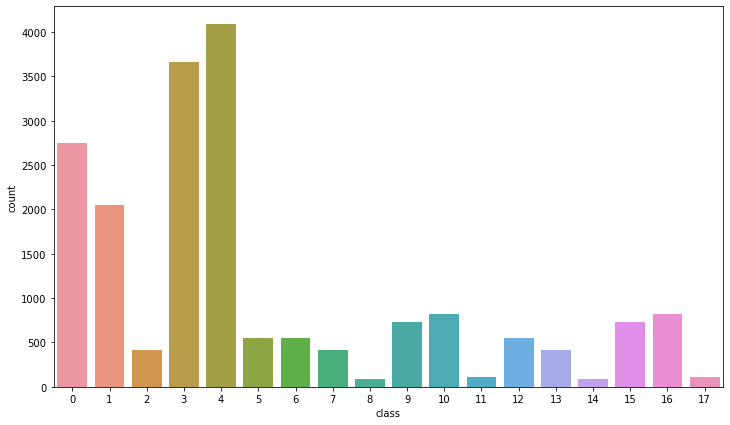

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(x='class', data=df_final, ax=ax)
plt.show()